In [2]:
from Helper_modules import denoiser, helper_func, import_img, noise, evaluator
import os
import numpy as np

In [3]:
base_dir = os.getcwd()  # Current working directory

# Set the Import image and convert it to numpy array and normalize it

In [4]:
image_path = f"{base_dir}/Dataset/train/002_img.png"
image = import_img.load_and_normalize_image(image_path)

# Initialize differnt type of Noises and plot them

In [5]:
salt_und_pepper_noisy_image = noise.add_salt_and_pepper_noise(image, salt_prob=0.008, pepper_prob=0.008)
gaussian_noisy_image = noise.add_gaussian_noise(image, sigma=0.15)
poisson_noisy_image = noise.add_poisson_noise(image)
speckle_noisy_image = noise.add_speckle_noise(image)

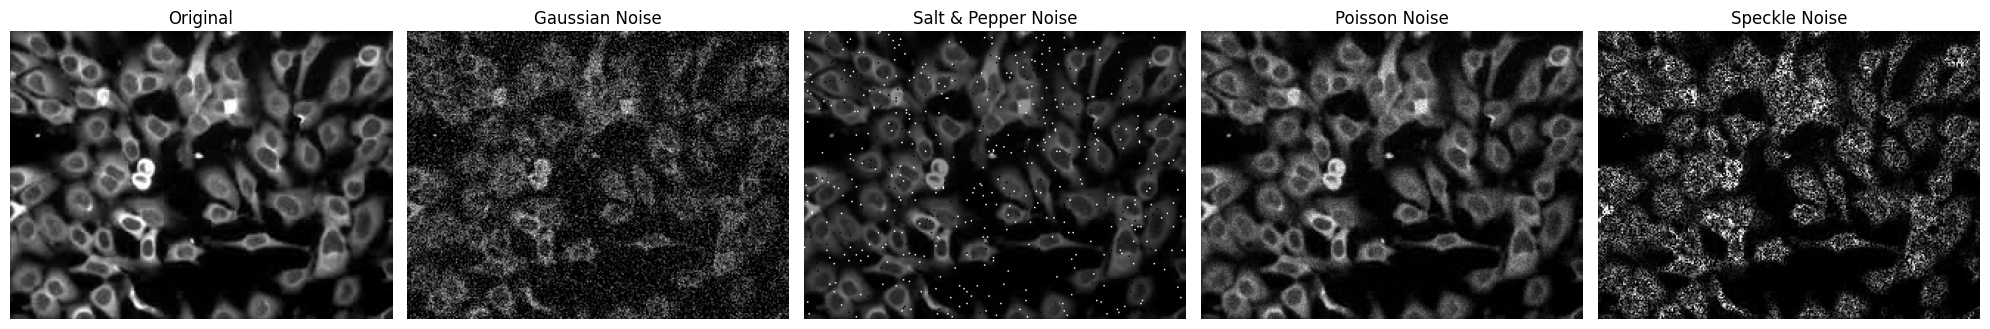

In [6]:
helper_func.plot_noisy_images(image, gaussian_noisy_image, salt_und_pepper_noisy_image, poisson_noisy_image, speckle_noisy_image)

In [10]:
img = image

In [35]:
image.shape

(195, 259)

In [37]:
32*8


256

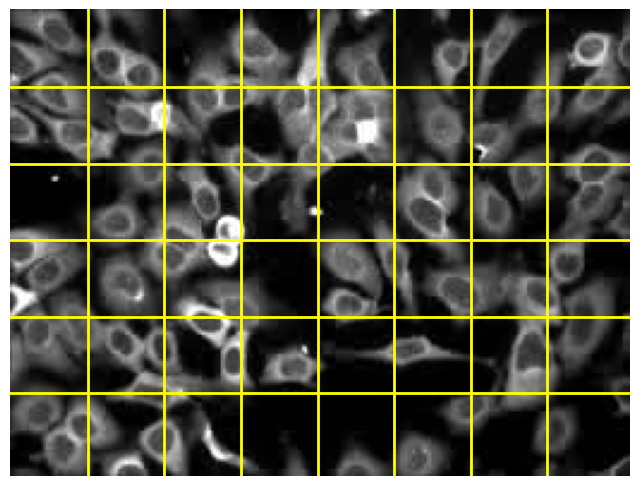

In [34]:
import matplotlib.pyplot as plt
# Define patch size (e.g., 32x32 pixels)
patch_size = 32
rows, cols = img.shape[0] // patch_size, img.shape[1] // patch_size

# Plot the original grayscale image
plt.figure(figsize=(8, 8))
plt.imshow(img, cmap="gray")

# Draw yellow lines to create a grid on the original image
for i in range(1, rows):
    plt.axhline(i * patch_size, color="yellow", linestyle="-", linewidth=2)
for j in range(1, cols):
    plt.axvline(j * patch_size, color="yellow", linestyle="-", linewidth=2)

plt.axis("off")  # Hide axes
plt.show()

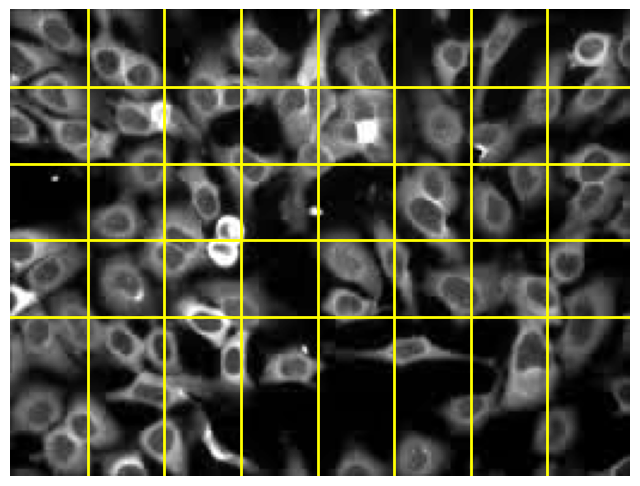

In [30]:
import matplotlib.pyplot as plt
# Define patch size (e.g., 32x32 pixels)
patch_size = 32
rows, cols = img.shape[0] // patch_size, img.shape[1] // patch_size

# Plot the original grayscale image
plt.figure(figsize=(8, 8))
plt.imshow(img, cmap="gray")

# Draw yellow lines to create a grid on the original image
for i in range(1, 5):
    plt.axhline(i * patch_size, color="yellow", linestyle="-", linewidth=2)
for j in range(1, cols):
    plt.axvline(j * patch_size, color="yellow", linestyle="-", linewidth=2)

plt.axis("off")  # Hide axes
plt.show()

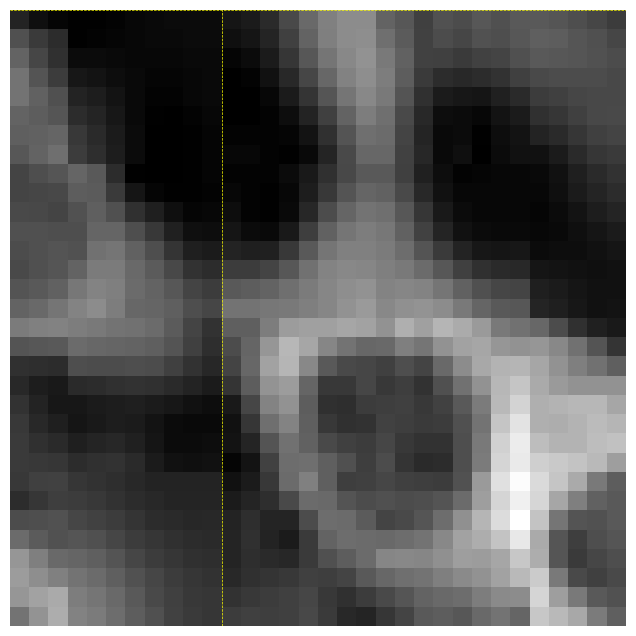

In [22]:
# Define patch size and stride
patch_size = 32
stride = 7  # The stride for overlapping patches

# Define the number of patches per row and column
rows, cols = img.shape[0] // patch_size, img.shape[1] // patch_size

# Plot the original grayscale image
plt.figure(figsize=(8, 8))
plt.imshow(img, cmap="gray")

# Loop to draw yellow grid lines on the original image
for i in range(1, rows):
    plt.axhline(i * patch_size, color="yellow", linestyle="--", linewidth=0.5)
for j in range(1, cols):
    plt.axvline(j * patch_size, color="yellow", linestyle="--", linewidth=0.5)

# Extract and show overlapping patches for the first 4 patches in the first row
for j in range(4):  # Only for the first 4 patches in the first row
    start_col = j * stride
    start_row = 0  # Keep the first row fixed
    end_row = start_row + patch_size
    end_col = start_col + patch_size
    patch = img[start_row:end_row, start_col:end_col]
    plt.imshow(patch, cmap="gray", extent=[start_col, end_col, start_row, end_row])

# Show the image with gridlines
plt.axis("off")
plt.show()


# Set the noise type nad select the noise

In [7]:
noisy_image = salt_und_pepper_noisy_image
noise_type = "Gaussian_Noise"

/home/arman/.conda/envs/DL/lib/python3.12/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 8 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/home/arman/.conda/envs/DL/lib/python3.12/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 9 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/home/arman/.conda/envs/DL/lib/python3.12/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/home/arman/.conda/envs/DL/lib/python3.12/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/home/arman/.conda/envs/DL/lib/python3.12/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 7 is too high: all coefficients will experience boundary effects.
  warnings.warn(


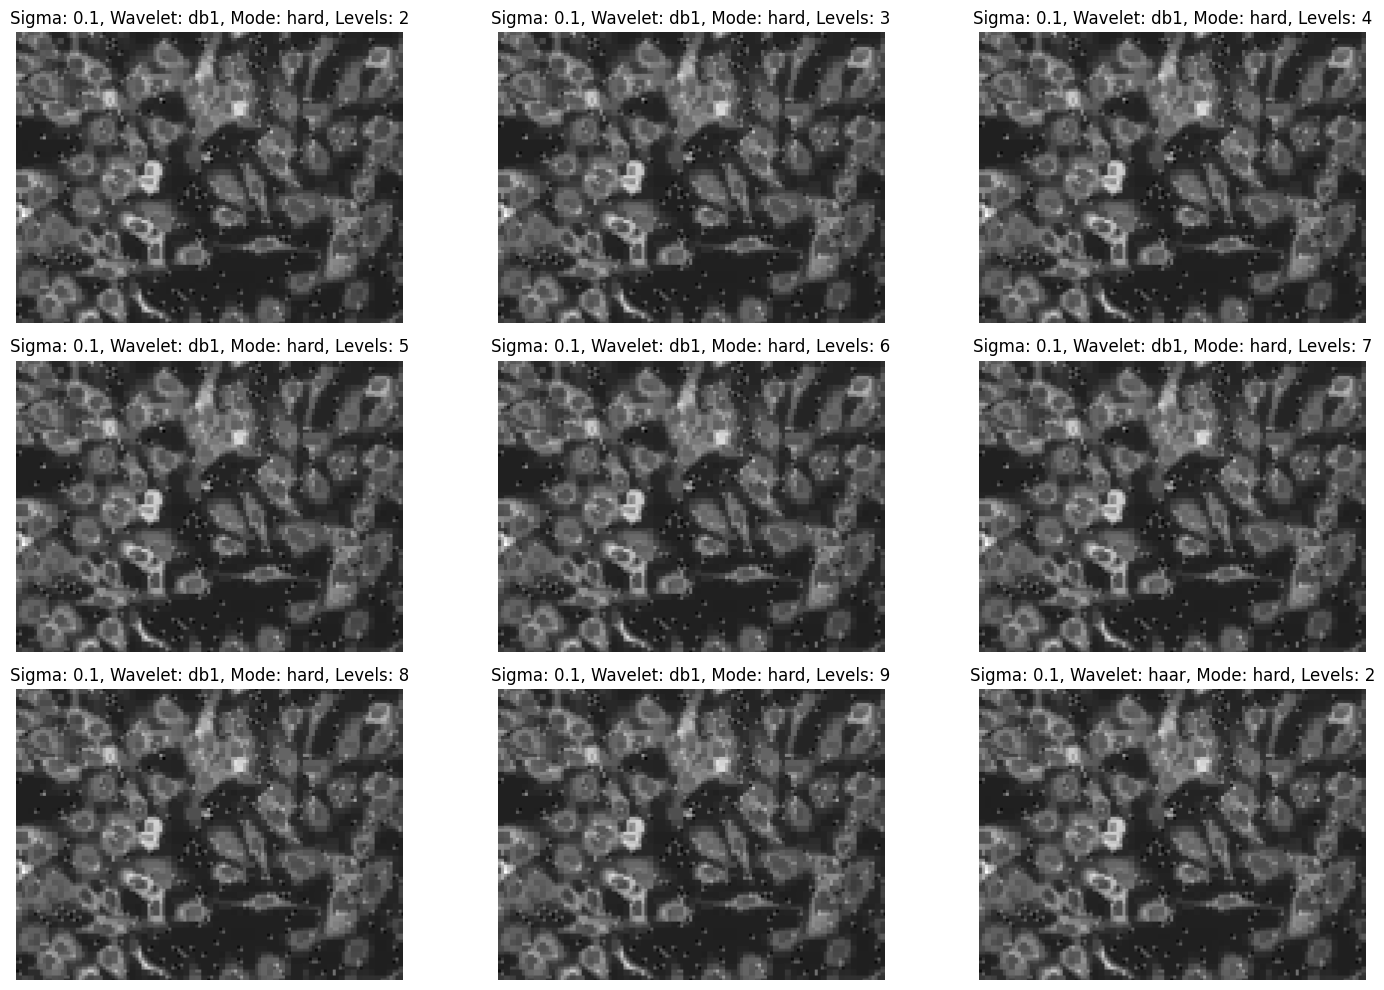

In [9]:
from skimage import img_as_float
from skimage.restoration import denoise_wavelet
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

# Parameters for testing
sigma_values = [0.1, 0.2, 0.6]
wavelet_types = ['db1', 'haar', 'sym4']
modes = ['hard']
wavelet_levels = list(range(2, 10))  # Levels from 2 to 9

# Container to store results
results = []

# Loop through parameter combinations
for sigma in sigma_values:
    for wavelet in wavelet_types:
        for mode in modes:
            for level in wavelet_levels:
                # Apply wavelet denoising
                denoised_image = denoise_wavelet(
                    noisy_image,
                    sigma=sigma,
                    wavelet=wavelet,
                    mode=mode,
                    wavelet_levels=level,
                    rescale_sigma=True
                )
                
                # Store the result with parameters for display
                results.append((sigma, wavelet, mode, level, denoised_image))

# Displaying a sample of results for visual comparison
fig, axes = plt.subplots(len(sigma_values), len(wavelet_types), figsize=(15, 10))
for i, (sigma, wavelet, mode, level, denoised_image) in enumerate(results[:len(sigma_values)*len(wavelet_types)]):
    ax = axes[i // len(wavelet_types), i % len(wavelet_types)]
    ax.imshow(denoised_image, cmap='gray')
    ax.set_title(f"Sigma: {sigma}, Wavelet: {wavelet}, Mode: {mode}, Levels: {level}")
    ax.axis('off')

plt.tight_layout()
plt.show()


# Evaluator of all denoiser to find the best hyperparameters

In [7]:
denoiser = denoiser.ImageDenoiser(image, noisy_image=noisy_image)
evaluator = evaluator.DenoisingEvaluator(image, noisy_image)

# Gaussian

In [8]:
# Example usage for Gaussian Denoising
gaussian_param_grid = {
    'd': [3, 5, 7, 9, 11],
    'sigmaX': list(np.linspace(0.1,20,50))
}
gaussian_denoise_func = lambda d, sigmaX: denoiser.denoise_with_gaussian_blur(kernel_size=(d, d), sigmaX=sigmaX)
# Run Gaussian denoising evaluation
best_gaussian_psnr, best_gaussian_params = evaluator.evaluate_denoising(gaussian_denoise_func, gaussian_param_grid, 'numbers/gaussian_psnr_results.csv', 'Gaussian')
denoised_gaussian = gaussian_denoise_func(**best_gaussian_params)

done


# Bilateral

In [9]:
# Example usage for Bilateral Filter Denoising
bilateral_param_grid = {
    'd': [3, 5, 7, 9, 11],
    'sigma_color': [25, 50, 75, 100, 125],
    'sigma_space': [25, 50, 75, 100, 125]
}
bilateral_denoise_func = lambda d, sigma_color, sigma_space: denoiser.denoise_with_bilateral_filter(
    d=d, sigma_color=sigma_color, sigma_space=sigma_space
)
# Run Bilateral filter evaluation
best_bilateral_psnr, best_bilateral_params = evaluator.evaluate_denoising(bilateral_denoise_func, bilateral_param_grid, 'numbers/bilateral_psnr_results.csv', 'Bilateral')


done


# NLM

In [16]:
# Example usage for Non-Local Means Denoising
nlm_param_grid = {
    'h': list(range(1, 100)),
}
nlm_denoise_func = lambda h: denoiser.denoise_with_nonlocal_means(h=h)
# Run Non-Local Means filter evaluation
best_nlm_psnr, best_nlm_params = evaluator.evaluate_denoising(
    nlm_denoise_func, nlm_param_grid, 'numbers/nlm_psnr_results.csv', 'Nonlocal Means')


done


In [21]:
img = nlm_denoise_func(**best_nlm_params)

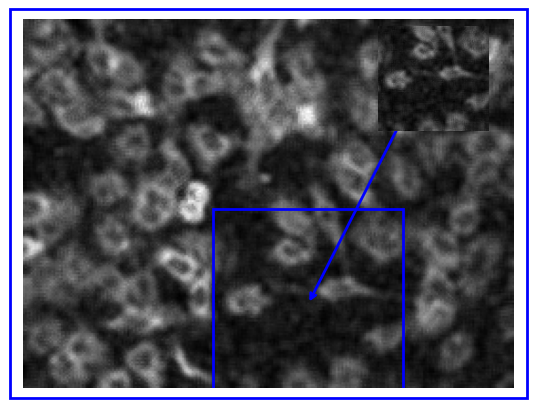

In [38]:

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.image as mpimg
# Display the main image
fig, ax = plt.subplots()
ax.imshow(img, cmap="gray")
ax.axis('off')

# Define coordinates for the zoomed-in area in pixels
left, right, top, bottom = 100, 200, 100, 200  # Adjust as needed

# Create inset axes for the zoomed-in view
inset_ax = inset_axes(ax, width="30%", height="30%", loc="upper right")
inset_ax.imshow(img, cmap="gray")  # Set to grayscale
inset_ax.axis('off')
inset_ax.set_xlim(left, right)
inset_ax.set_ylim(bottom, top)

# Add a visible border to the inset by drawing a rectangle around it
# The coordinates for inset_ax are relative to the figure, so we use its position data
rect = plt.Rectangle(
    (inset_ax.get_position().x0, inset_ax.get_position().y0), 
    inset_ax.get_position().width, 
    inset_ax.get_position().height, facecolor='none', linewidth=2,
    transform=fig.transFigure  # Use figure coordinates
)
fig.patches.append(rect)

# Draw an annotation arrow
ax.annotate(
    '',  # No text for the arrow itself
    xy=((left + right) / 2, (top + bottom) / 2),  # Pointing location in the main image
    xytext=(0.8, 0.8),  # Inset location as a fraction of the image
    textcoords='axes fraction',
    arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle='->', lw=2)
)

# Add a rectangle to highlight the zoomed area in the main image
ax.add_patch(plt.Rectangle((left, top), right-left, bottom-top,
                           edgecolor='blue', facecolor='none', lw=2))

plt.show()


In [20]:
print(best_nlm_psnr)

25.741214096150095


# Median Filter

In [11]:
median_param_grid = {
    'size': [3, 5, 7, 9, 11]
}
median_denoise_func = lambda size: denoiser.denoise_with_median_filter(size=size)
# Run Median Filter denoising evaluation
best_median_psnr, best_median_params = evaluator.evaluate_denoising(median_denoise_func, median_param_grid, 'numbers/median_psnr_results.csv', 'Median')
denoised_median = median_denoise_func(**best_median_params)

done


# BM3D(our)

In [12]:
# # Define BM3D parameter grid
# bm3d_param_grid = {
#     'patch_size': [30],
#     'stride': [10],
#     'threshold': [0.23],
#     'similarity_threshold': [5]
# }
# bm3d_denoise_func = lambda patch_size, stride, threshold, similarity_threshold: denoiser.denoise_with_bm3d(
#     patch_size=patch_size, stride=stride, threshold=threshold, similarity_threshold=similarity_threshold
# )
# # Run BM3D evaluation
# best_bm3d_psnr, best_bm3d_params = evaluator.evaluate_denoising(bm3d_denoise_func, bm3d_param_grid, 'numbers/bm3d_psnr_results.csv', 'BM3D')

# BM3D(Library)

In [26]:
import cv2
import bm3d

In [34]:
cv2.setUseOptimized(True)
    
img = cv2.imread('/home/arman/Documents/arman/Uni/Master/Semester 3/ip_repository/ImageProcessing/Dataset/train/002_img.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
GuassNoise = np.random.normal(0, 70, img.shape)
noisyImg = img + GuassNoise # float type noisy image
cv2.imwrite('noisy____.png', noisyImg)
basic_img =bm3d.bm3d(z=noisyImg,sigma_psd=[*range(100)])

done


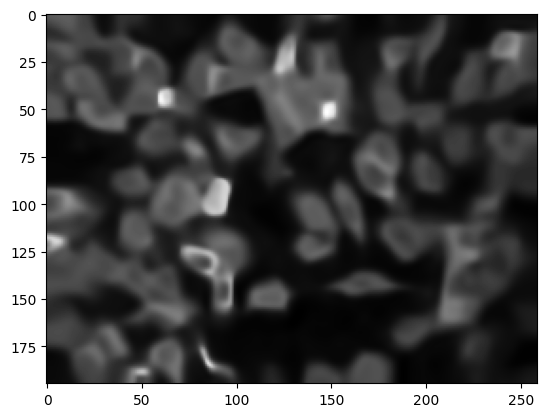

In [25]:
import bm3d
# Define BM3D with sigma_psd parameter grid
bm3d2_param_grid = {
    'sigma_psd': [0.],  # Noise standard deviation range
}

# Apply BM3D function using lambda, ensure 'stage_arg' is passed as BM3DStages constant
apply_bm3d = lambda sigma_psd: bm3d.bm3d(
    noisy_image, 
    sigma_psd=sigma_psd, blockmatches= (False, False))
# Run BM3D with sigma_psd evaluation
best_bm3d2_psnr, best_bm3d2_params = evaluator.evaluate_denoising(apply_bm3d, bm3d2_param_grid, 'numbers/bm3d2_psnr_results.csv','BM3D2')
helper_func.plot(apply_bm3d(**best_bm3d2_params))

<div class="alert alert-block alert-warning">
**Note:** Iterative
</div>

# Wavelet

In [14]:
from skimage import restoration

In [15]:
# Example usage for Wavelet Denoising
wavelet_param_grid = {
    'sigma': [0.001],
    'wavelet': [
        'db1', 'db2', 'db3', 'db4', 'db5', 'sym2', 'sym3', 'sym4', 'coif1', 'coif2',
        'bior1.1', 'bior1.3', 'bior2.2', 'bior3.1', 'bior3.3', 'rbio1.1', 'rbio2.2',
        'dmey', 'haar'
    ],
    'mode': ['soft', 'hard'], 
    'wavelet_levels': [None, 1, 2, 3],
    'convert2ycbcr': [False],
    'method': ['BayesShrink', 'VisuShrink'],
    'rescale_sigma': [True, False]
}

wavelet_denoise_func = lambda sigma, wavelet, mode, wavelet_levels, convert2ycbcr, method, rescale_sigma: restoration.denoise_wavelet(
        noisy_image, sigma=sigma, wavelet=wavelet, mode=mode,
        wavelet_levels=wavelet_levels, convert2ycbcr=convert2ycbcr,
        method=method, rescale_sigma=rescale_sigma
    )

# Run Wavelet denoising evaluation
best_wavelet_psnr, best_wavelet_params = evaluator.evaluate_denoising(wavelet_denoise_func, wavelet_param_grid, 'numbers/wavelet_psnr_results.csv', 'Wavelet')
denoised_wavelet = wavelet_denoise_func(**best_wavelet_params)

/home/arman/.conda/envs/DL/lib/python3.12/site-packages/skimage/restoration/_denoise.py:1034: UserWarning: Wavelet thresholding was designed for use with orthogonal wavelets. For nonorthogonal wavelets such as bior1.1,results are likely to be suboptimal.
  out = _wavelet_threshold(
/home/arman/.conda/envs/DL/lib/python3.12/site-packages/skimage/restoration/_denoise.py:1034: UserWarning: Wavelet thresholding was designed for use with orthogonal wavelets. For nonorthogonal wavelets such as bior1.3,results are likely to be suboptimal.
  out = _wavelet_threshold(
/home/arman/.conda/envs/DL/lib/python3.12/site-packages/skimage/restoration/_denoise.py:1034: UserWarning: Wavelet thresholding was designed for use with orthogonal wavelets. For nonorthogonal wavelets such as bior2.2,results are likely to be suboptimal.
  out = _wavelet_threshold(
/home/arman/.conda/envs/DL/lib/python3.12/site-packages/skimage/restoration/_denoise.py:1034: UserWarning: Wavelet thresholding was designed for use wi

done


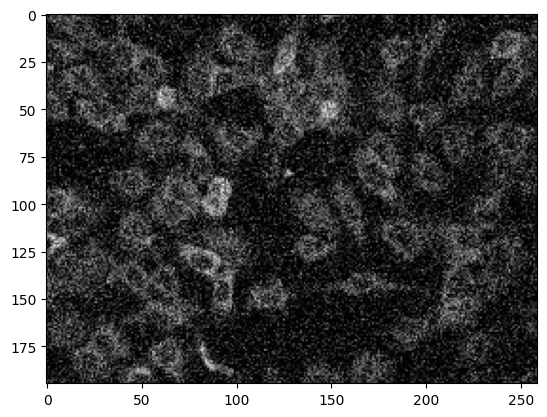

In [16]:
helper_func.plot(wavelet_denoise_func(**best_wavelet_params))

# Bergman TV

In [17]:
# Example usage for TV Bregman Denoising
tv_bregman_param_grid = {
    'weight': [0.1, 0.15, 0.2, 0.25],
    'max_iter': [100, 150, 200, 250]
}
tv_bregman_denoise_func = lambda weight, max_iter: denoiser.denoise_with_tv_bregman(weight=weight, max_iter=max_iter)
# Run TV Bregman denoising evaluation
best_tv_bregman_psnr, best_tv_bregman_params = evaluator.evaluate_denoising(tv_bregman_denoise_func, tv_bregman_param_grid, 'numbers/tv_bregman_psnr_results.csv', 'TV_Bregman')
denoised_tv_bregman = tv_bregman_denoise_func(**best_tv_bregman_params)

done


# TV Chambolle

In [18]:
# Example usage for TV Chambolle Denoising
tv_chambolle_param_grid = {
    'weight': [0.05, 0.1, 0.15, 0.2],
    'eps': [1e-4, 1e-3, 1e-2, 1e-1],
    'max_iter': [100, 150, 200, 250]
}
tv_chambolle_denoise_func = lambda weight, eps, max_iter: denoiser.denoise_with_tv_chambolle(img= denoised_median,weight=weight, epsilon=eps, max_num_iter=max_iter)
# Run TV Chambolle denoising evaluation
best_tv_chambolle_psnr, best_tv_chambolle_params = evaluator.evaluate_denoising(tv_chambolle_denoise_func, tv_chambolle_param_grid, 'numbers/tv_chambolle_psnr_results.csv', 'TV_Chambolle')
denoised_tv_chambolle = tv_chambolle_denoise_func(**best_tv_chambolle_params)

done


# Plot all the results (Denoised Images and correspondent PSNRs)

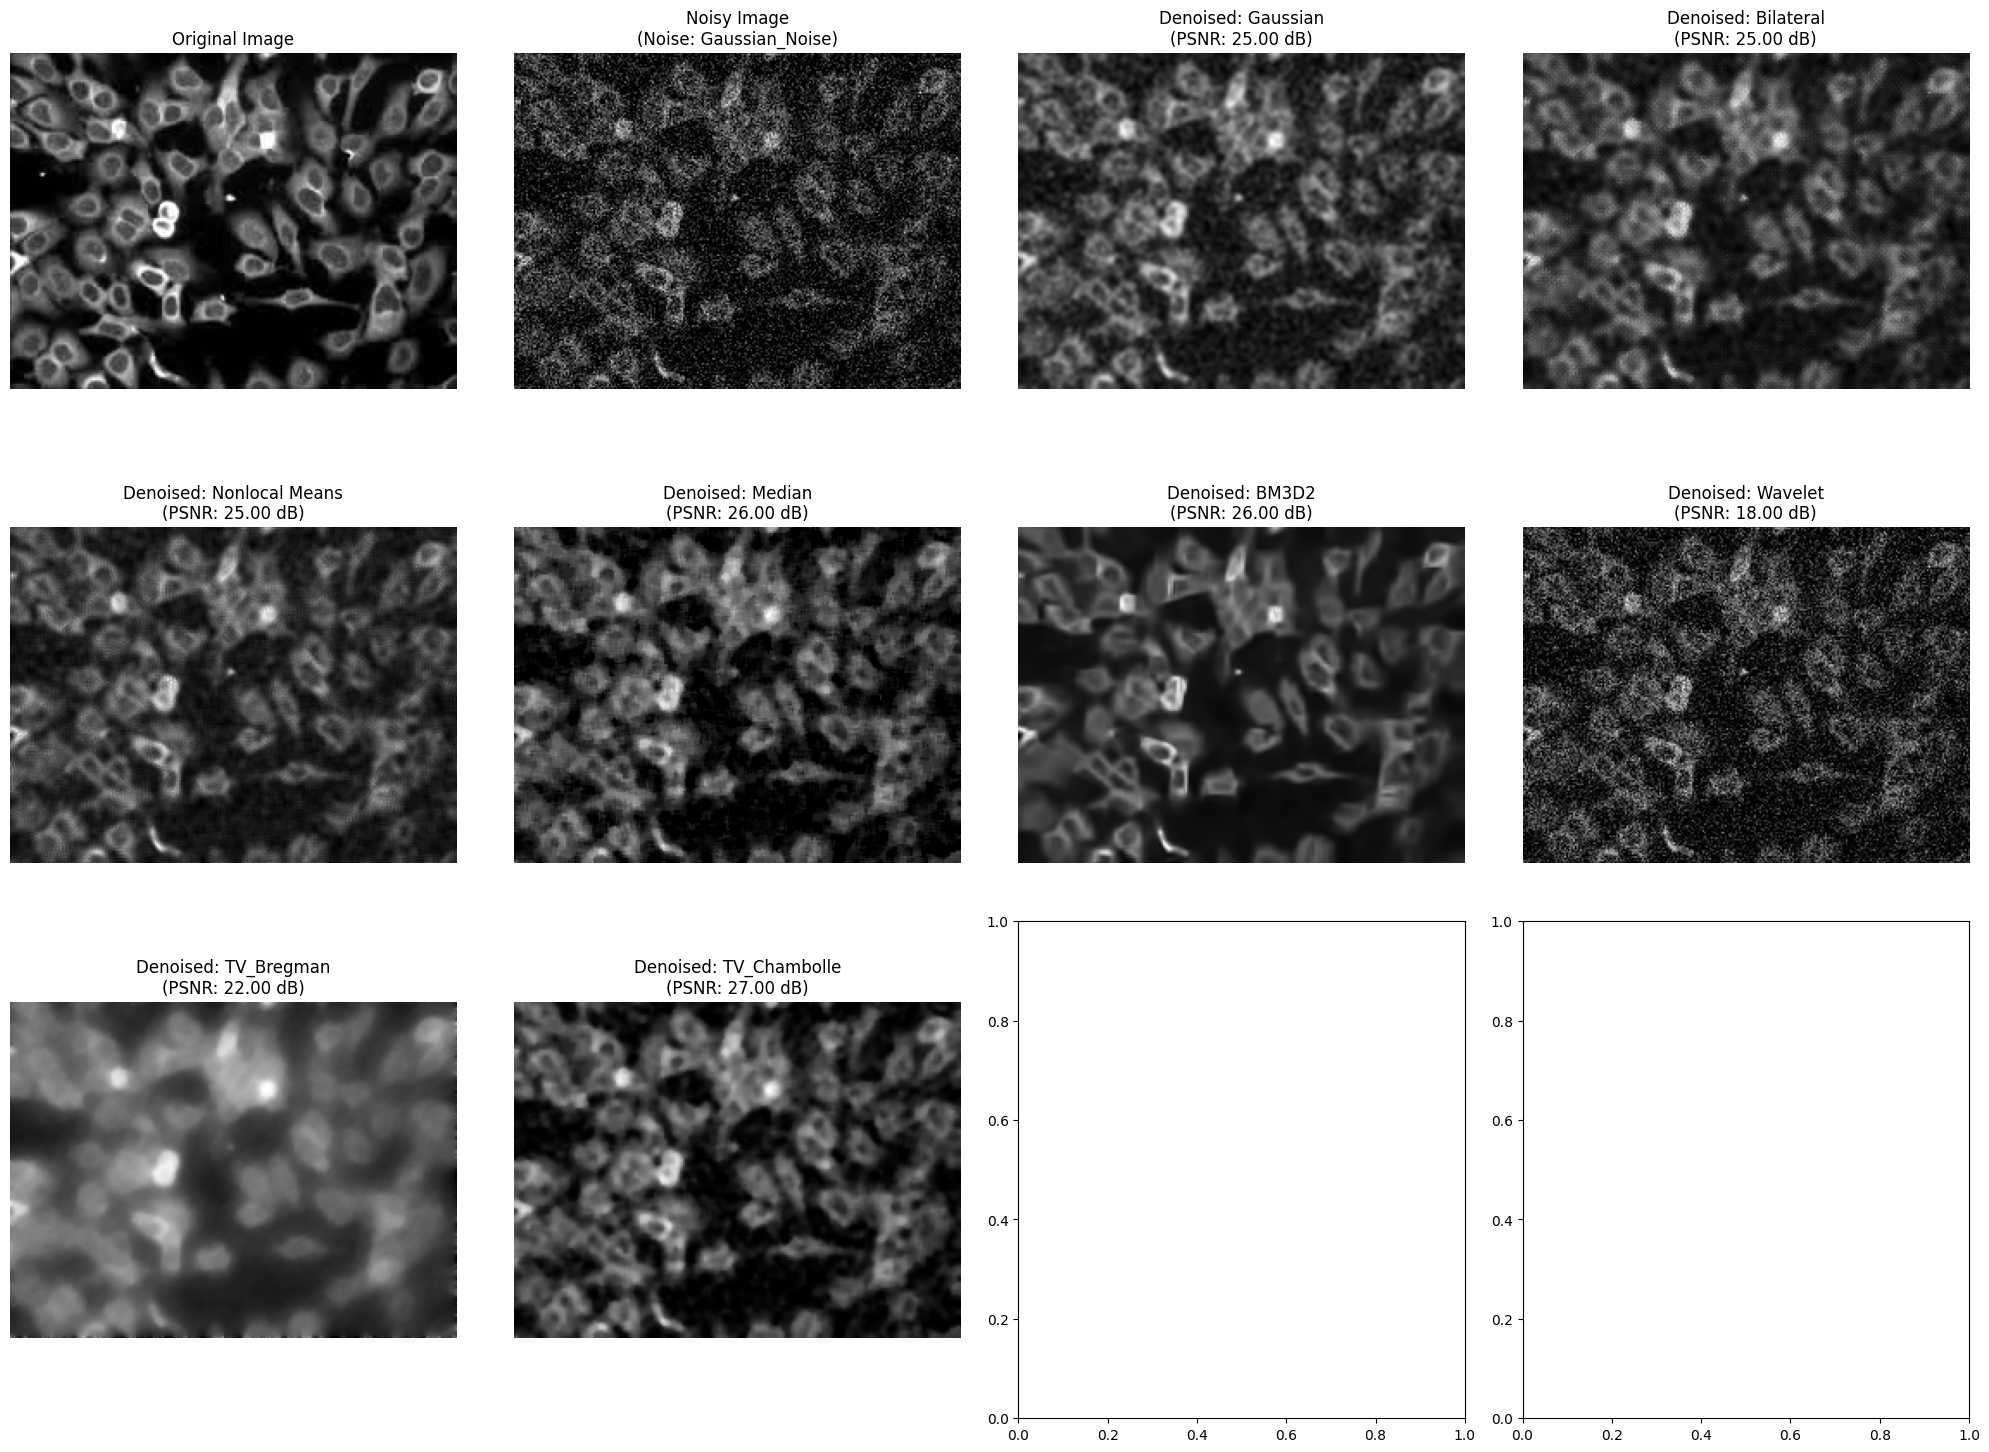

In [19]:
helper_func.plot_all_denoised(original=image, noisy=noisy_image, all_denoised=evaluator.all_denoised, 
                              method_names=evaluator.method_names, psnrs=evaluator.all_psnrs, noise_type=noise_type)

<div class="alert alert-block alert-warning">
**Note:** From Here is not Important
</div>
